# Task 7: Read Handwriting using CNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist= tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

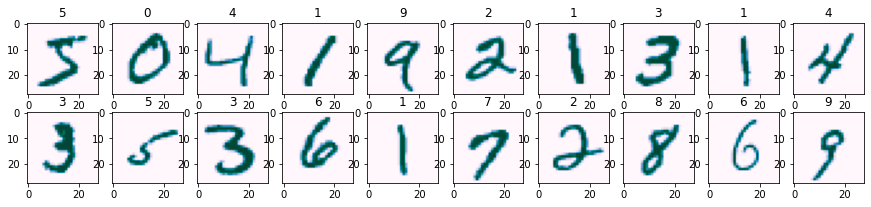

In [5]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
    ax=fig.add_subplot(2,10,i+1)
    ax.imshow(np.squeeze(x_train[i]),cmap='PuBuGn')
    ax.set_title(y_train[i])

In [6]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [7]:
xtrain = x_train/255.0
xtest = x_test/255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0384 - accuracy: 0.9879
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0292 - accuracy: 0.9913
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0165 - accuracy: 0.9950


In [13]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 5s 8ms/step - loss: 16.3831 - accuracy: 0.9770
[16.383054733276367, 0.9769999980926514]


In [14]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 6.2734 - accuracy: 0.9844 - val_loss: 2.5250 - val_accuracy: 0.9922
Epoch 2/10
1688/1688 [==============================] - 16s 9ms/step - loss: 2.5802 - accuracy: 0.9915 - val_loss: 2.8328 - val_accuracy: 0.9925
Epoch 3/10
1688/1688 [==============================] - 18s 10ms/step - loss: 2.3897 - accuracy: 0.9920 - val_loss: 3.2154 - val_accuracy: 0.9902
Epoch 4/10
1688/1688 [==============================] - 20s 12ms/step - loss: 2.1002 - accuracy: 0.9924 - val_loss: 4.4198 - val_accuracy: 0.9888
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 1.9609 - accuracy: 0.9933 - val_loss: 3.8705 - val_accuracy: 0.9907
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 1.7680 - accuracy: 0.9938 - val_loss: 2.8982 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 17s 10ms/step - loss: 1.8191 - accuracy: 0.9938 - val_loss: 4.3303 - v

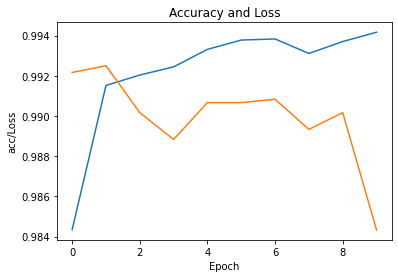

In [15]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

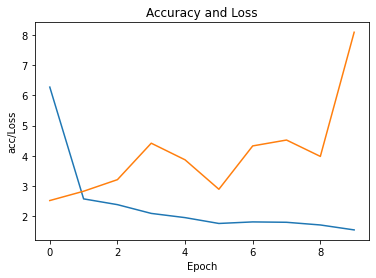

In [16]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

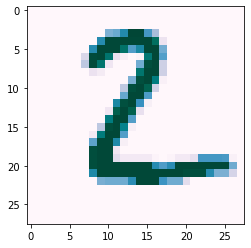

In [17]:
plt.imshow(np.squeeze(x_test[1]),cmap="PuBuGn")

In [18]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

313/313 [==============================] - 3s 7ms/step
7


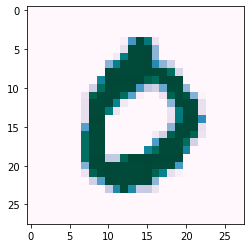

In [19]:
plt.imshow(np.squeeze(x_test[3]),cmap="PuBuGn")

In [20]:
prediction=model.predict(x_test)
y_predicted_labels = [np.argmax(i)  for i in prediction]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 2s 7ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    2,    0,    4,    3,    1,    1,    0],
       [   0, 1129,    4,    0,    0,    0,    1,    1,    0,    0],
       [   1,    1, 1015,    2,    2,    0,    0,    7,    3,    1],
       [   0,    3,   15,  967,    0,   13,    1,    2,    3,    6],
       [   0,    4,    8,    1,  945,    0,    0,    2,    0,   22],
       [   3,    1,    0,    6,    0,  868,    5,    1,    4,    4],
       [   2,    4,    3,    1,    3,   11,  934,    0,    0,    0],
       [   0,    5,   12,    4,    0,    0,    0, 1003,    1,    3],
       [   3,    5,   11,   11,    3,    6,    1,    7,  925,    2],
       [   2,    4,    1,    5,    4,    7,    1,   12,    2,  971]])>

Text(69.0, 0.5, 'Truth')

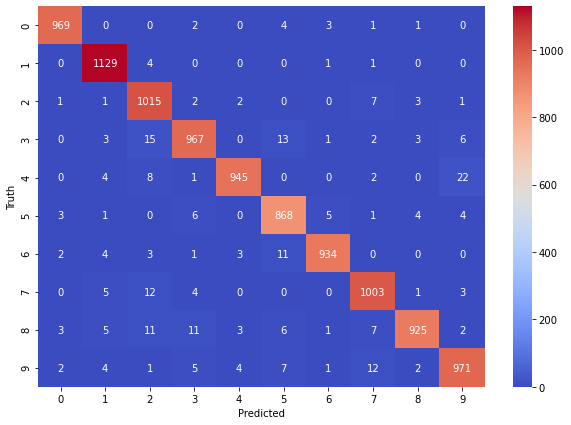

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 3s 8ms/step
Predicted Value:  2
Successful prediction


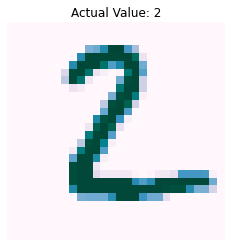

In [22]:
plt.imshow(x_test[1],cmap='PuBuGn')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')